In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
import os
from settings import BASE_DIR
from data import processing_data
# Loading our dataset

data_path = os.path.join(BASE_DIR, "dataset\movies_data_processed_v2.csv")
df = pd.read_csv(data_path)
df['log_gross'] = np.log1p(df['gross'])
df['log_gross_bin'] = pd.qcut(df['log_gross'], q=10, labels=False)
df.head()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\phuocnguyen\AppData\Local\Temp\ipykernel_27232\400826784.py:12: SyntaxWarning: invalid escape sequence '\m'
  data_path = os.path.join(BASE_DIR, "dataset\movies_data_processed_v2.csv")


,name,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_gross,log_gross_bin
0,Love Hurts,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.662455,3
1,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",16.740635,3
2,Puss in Boots: The Last Wish,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",19.992952,9
3,The Fifth Element,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,25000000.0,"France, United Kingdom",19.391157,8
4,Superman,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",19.520887,8


Fold 1

Training Metrics:
R2 score: 0.7951
MSE: 1.9495
MLSE: 0.0105
MAPE: 715.94%

Test Metrics:
R2 score: 0.6289
MSE: 3.4427
MSLE: 0.0200
MAPE: 28042.94%


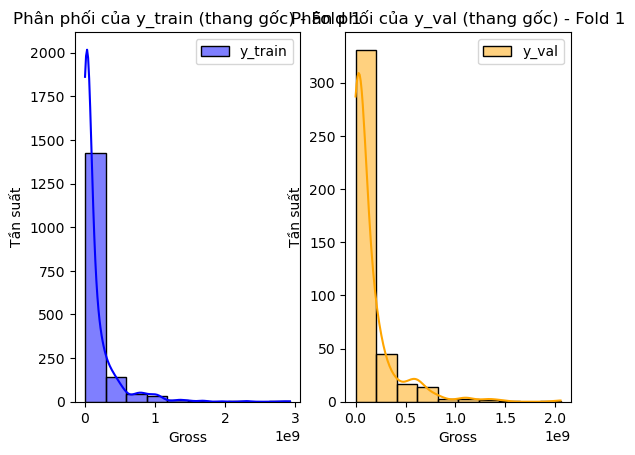

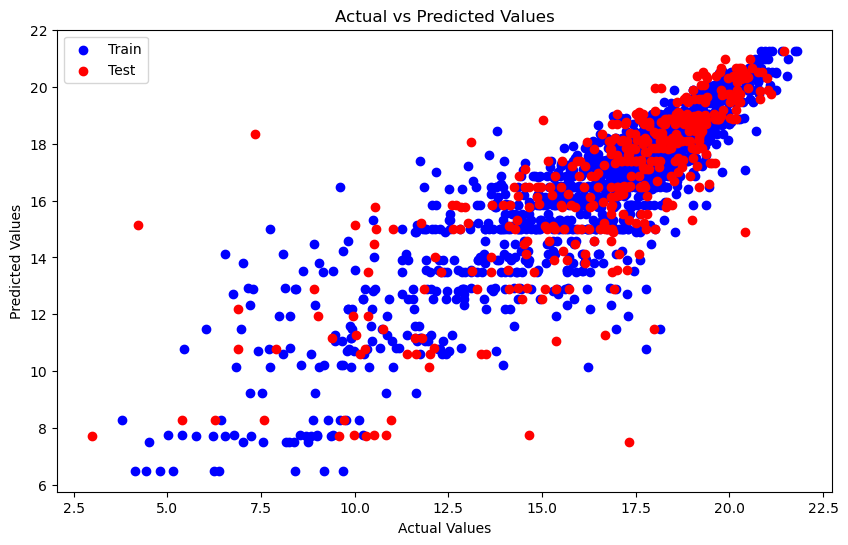

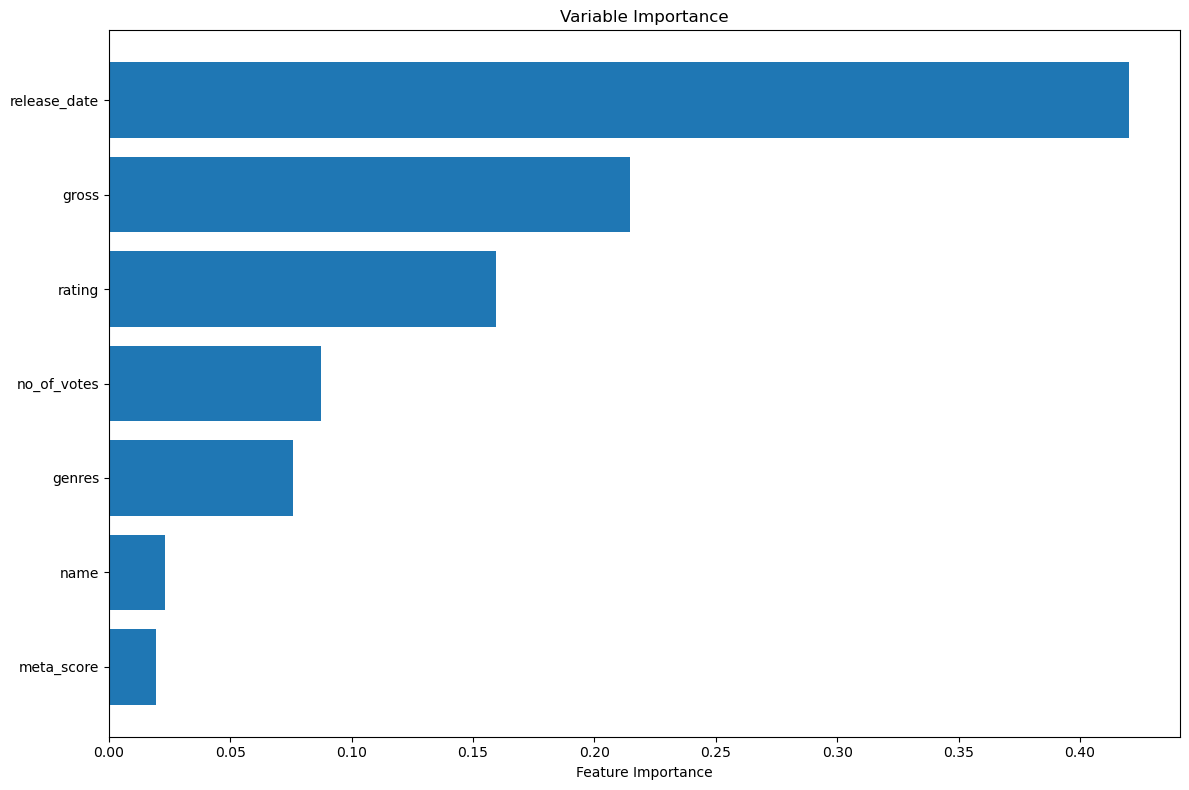

Fold 2

Training Metrics:
R2 score: 0.7988
MSE: 1.8595
MLSE: 0.0103
MAPE: 633.32%

Test Metrics:
R2 score: 0.6128
MSE: 4.0133
MSLE: 0.0223
MAPE: 6520.74%


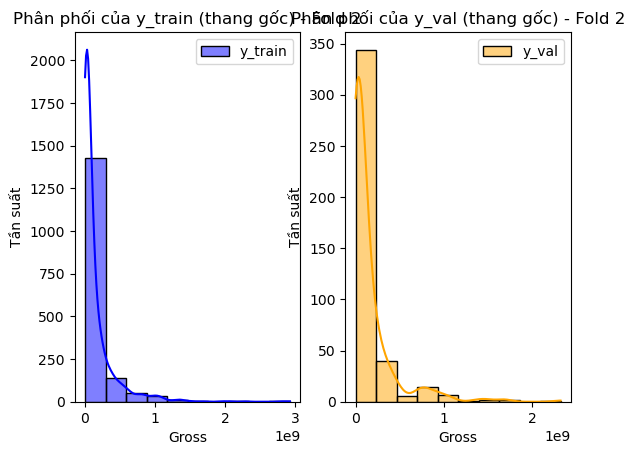

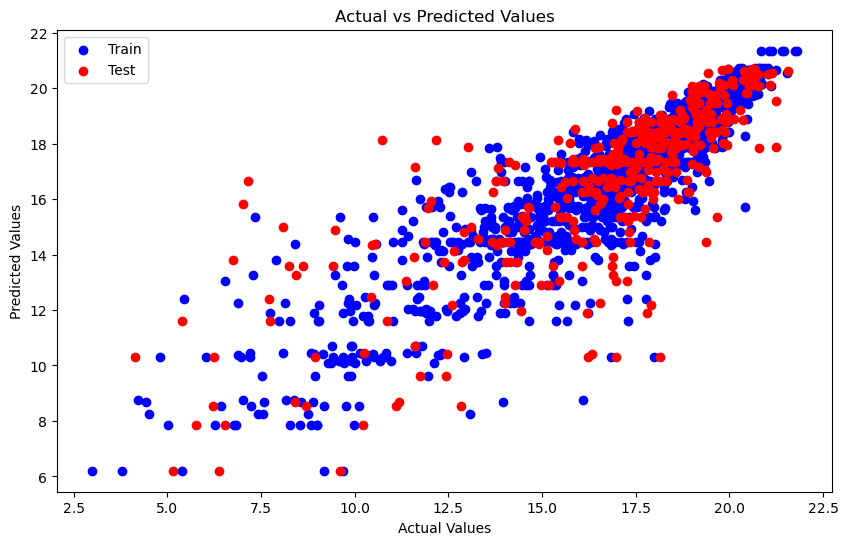

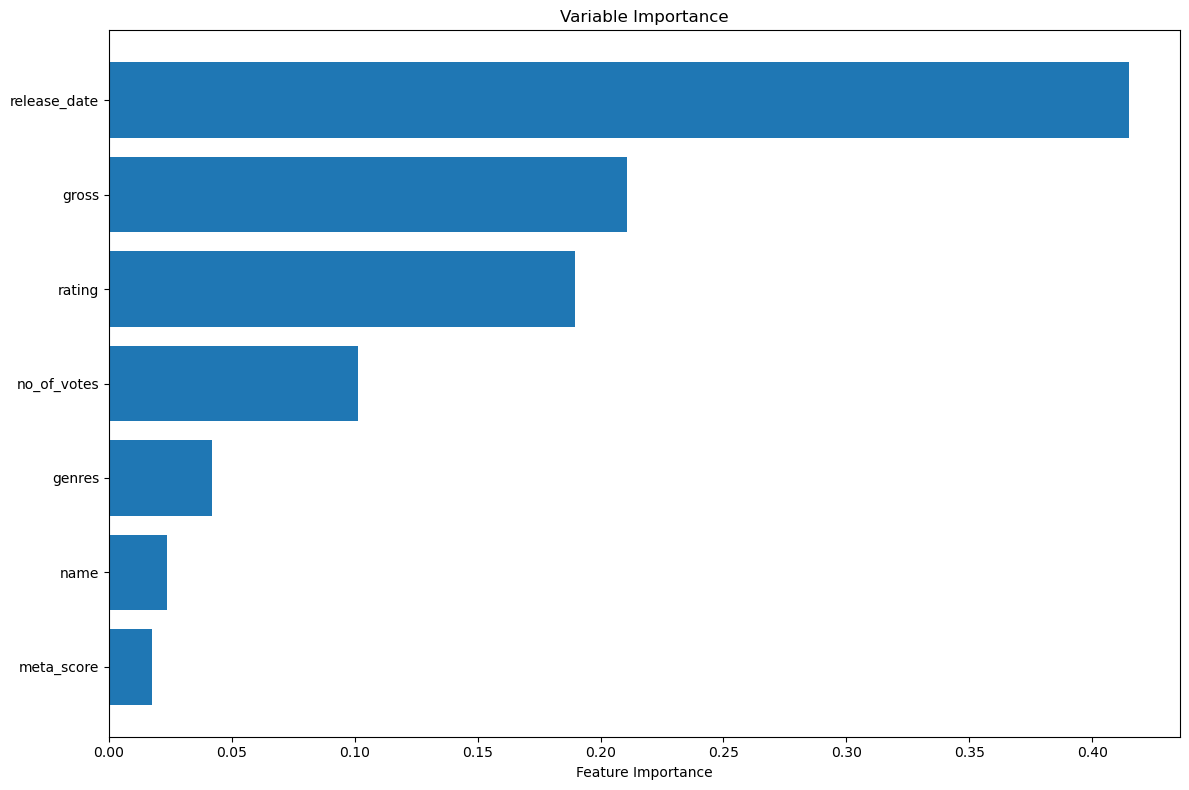

Fold 3

Training Metrics:
R2 score: 0.8132
MSE: 1.8017
MLSE: 0.0103
MAPE: 594.63%

Test Metrics:
R2 score: 0.5992
MSE: 3.5070
MSLE: 0.0174
MAPE: 2347.71%


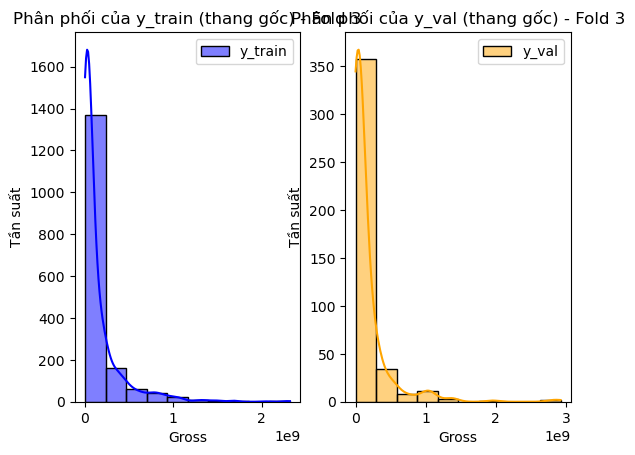

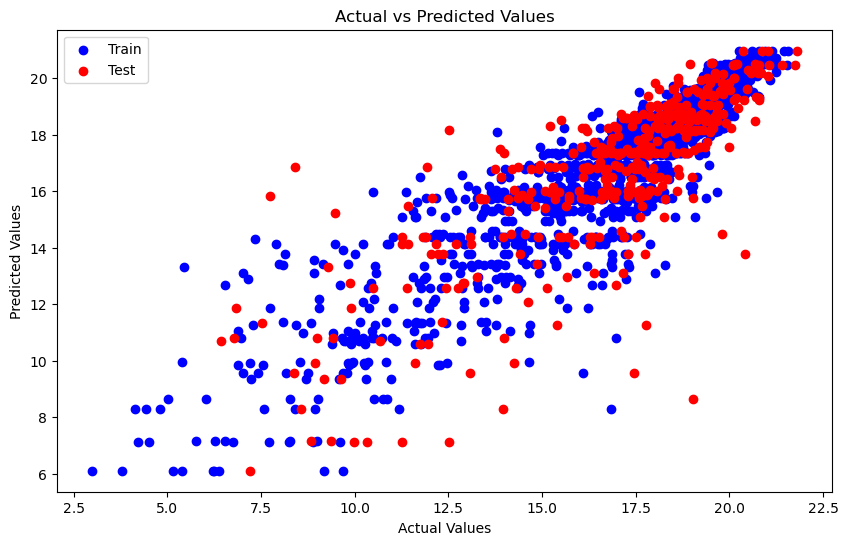

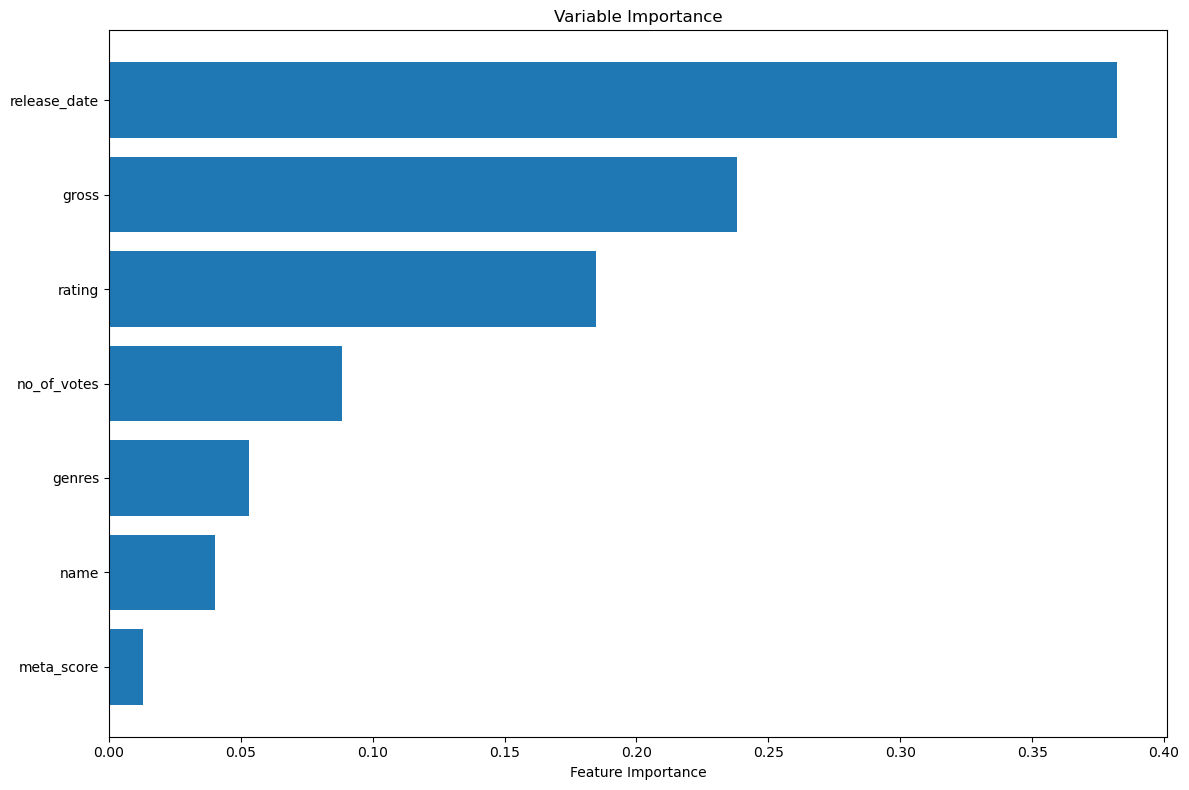

Fold 4

Training Metrics:
R2 score: 0.8183
MSE: 1.7083
MLSE: 0.0093
MAPE: 622.88%

Test Metrics:
R2 score: 0.4601
MSE: 5.2442
MSLE: 0.0318
MAPE: 12098.32%


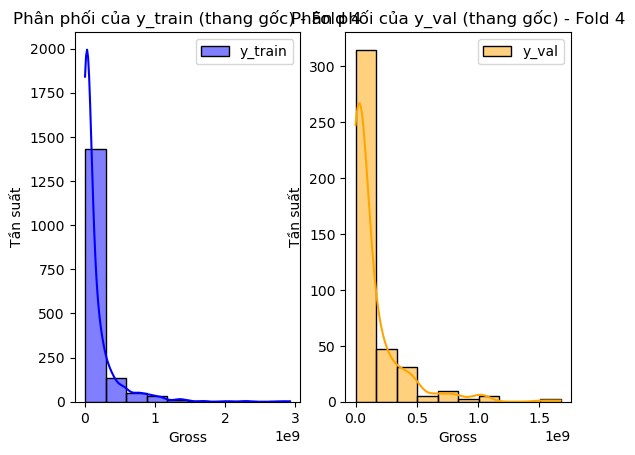

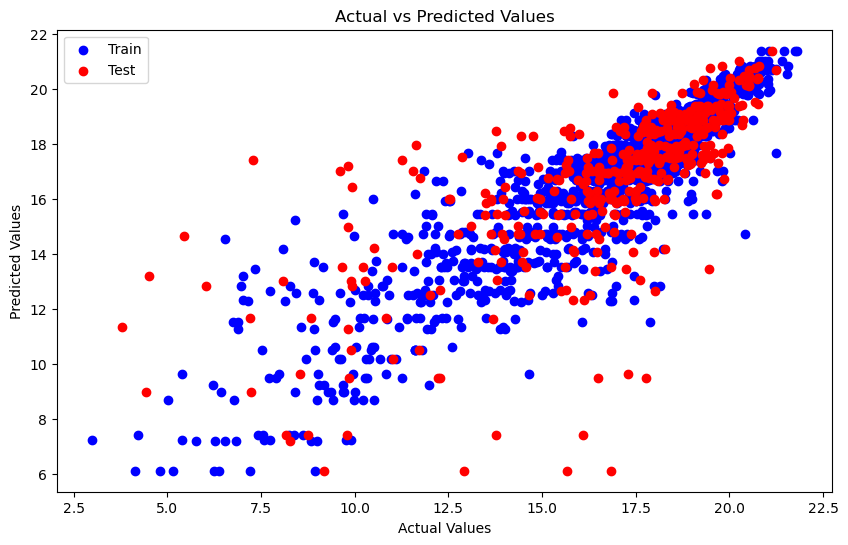

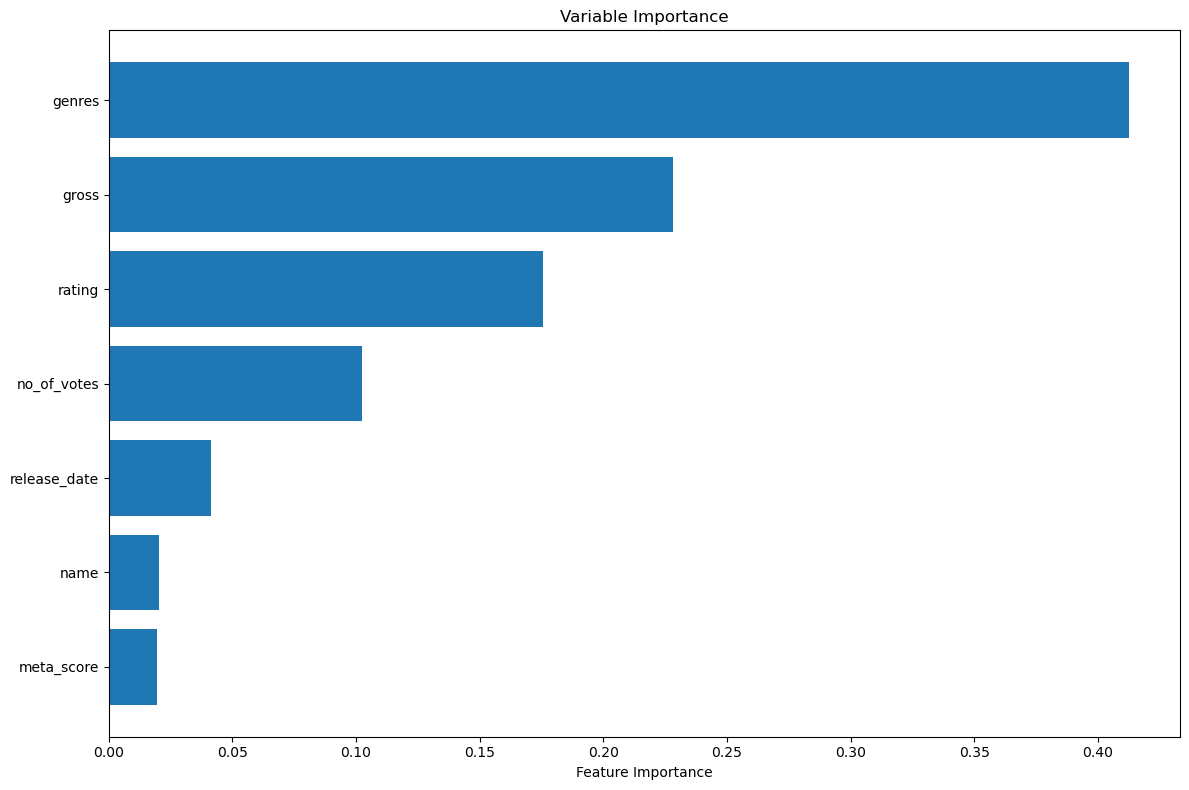

Fold 5

Training Metrics:
R2 score: 0.8280
MSE: 1.6389
MLSE: 0.0092
MAPE: 542.41%

Test Metrics:
R2 score: 0.4531
MSE: 5.0418
MSLE: 0.0263
MAPE: 7622.77%


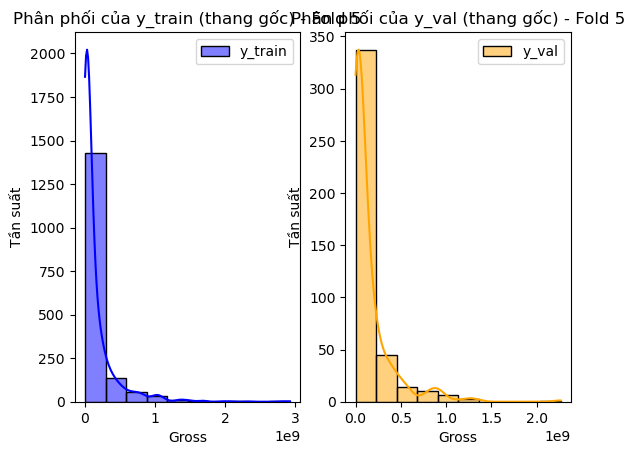

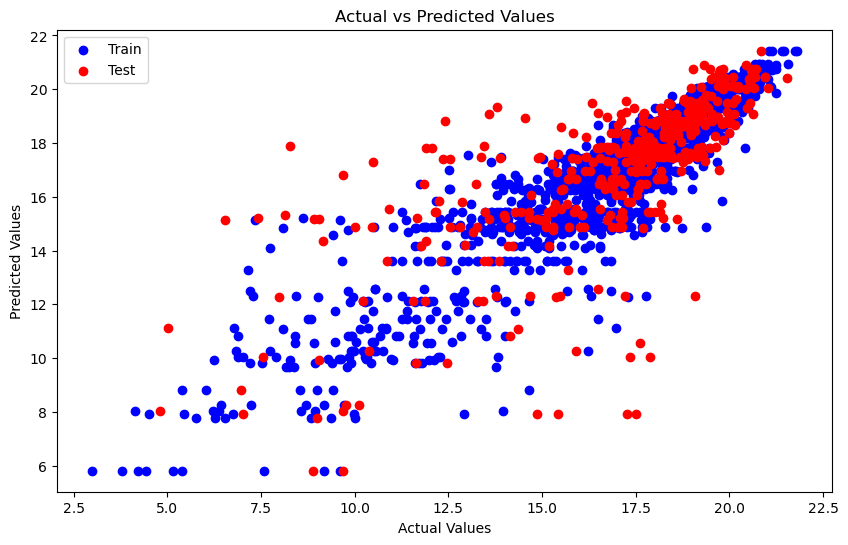

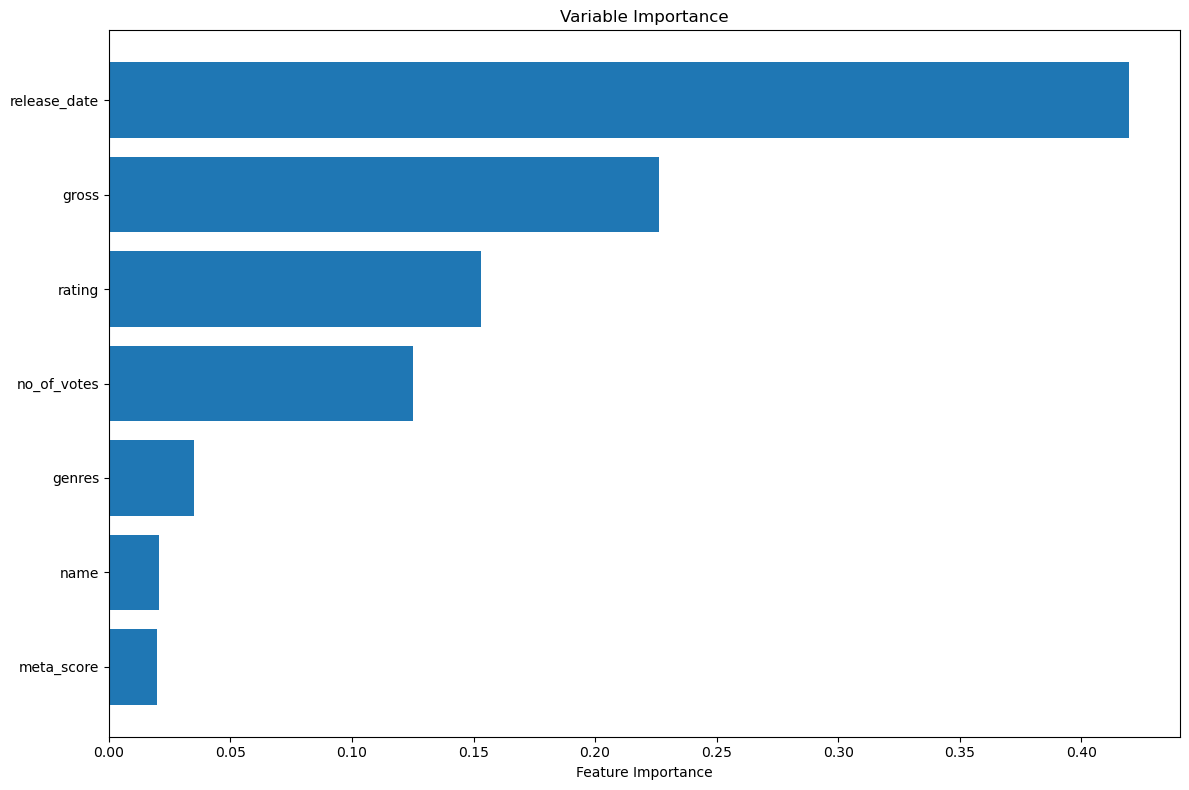

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
def visualize_results(y_train, train_predictions, y_test, test_predictions):
    train_r2, train_mse, train_msle, train_mape = calculate_metrics(
        y_train, train_predictions
    )
    test_r2, test_mse, test_msle, test_mape = calculate_metrics(y_test, test_predictions)

    print(f"\nTraining Metrics:")
    print(f"R2 score: {train_r2:.4f}")
    print(f"MSE: {train_mse:.4f}")
    print(f"MLSE: {train_msle:.4f}")
    print(f"MAPE: {train_mape:.2f}%")

    print(f"\nTest Metrics:")
    print(f"R2 score: {test_r2:.4f}")
    print(f"MSE: {test_mse:.4f}")
    print(f"MSLE: {test_msle:.4f}")
    print(f"MAPE: {test_mape:.2f}%")


    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_train, train_predictions, color="blue", label="Train")
    plt.scatter(y_test, test_predictions, color="red", label="Test")
    plt.title("Actual vs Predicted Values")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()

    # Feature importance
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    plt.figure(figsize=(12, 8))
    plt.barh(pos, feature_importance[sorted_idx], align="center")
    plt.yticks(pos, df.columns[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Variable Importance")
    plt.tight_layout()
    plt.show()

def calculate_metrics(y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        msle = mean_squared_log_error(y_true, y_pred)
        mape = np.mean(np.abs((np.exp(y_true) - np.exp(y_pred)) / np.exp(y_true))) * 100
        return r2, mse, msle, mape

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"Fold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()
    X_train, y_train, X_test, y_test = processing_data(df_train, df_val, fold=fold)
    model = DecisionTreeRegressor(
        max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42
    )
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    visualize_results(y_train, train_predictions, y_test, test_predictions)


    








    


